<a href="https://colab.research.google.com/github/suhyeon5280/data/blob/main/%5B%EB%AF%B8%EC%85%98%5D_%EC%A3%BC%EC%9C%A0%EC%86%8C_%EA%B0%80%EA%B2%A9_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="NanumBarunGothic")

import warnings
import glob
import io
from google.colab import drive
warnings.filterwarnings(action='ignore')

In [109]:
!apt-get install -y fonts-nanum*
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts,

### opinet 월별 데이터 불러오기

In [110]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
tdf = pd.read_csv('/content/drive/MyDrive/computervision/gas_station_price.csv')

In [112]:
tdf.shape

(581897, 11)

In [113]:
tdf

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0033584,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178(유천동),2024년 01월,HD현대오일뱅크,셀프,1767.84,1525.74,1432.23,0.00
1,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2024년 01월,S-OIL,셀프,0.00,1551.90,1477.90,1297.74
2,A0011408,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,2024년 01월,SK에너지,셀프,1760.00,1551.97,1454.23,0.00
3,A0010581,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475 (내곡동),2024년 01월,SK에너지,셀프,0.00,1506.29,1440.97,1252.42
4,A0011610,강원 강릉시,(주)삼보물류 삼보주유소,강원 강릉시 동해대로 3970,2024년 01월,S-OIL,일반,0.00,1568.00,1505.10,1400.00
...,...,...,...,...,...,...,...,...,...,...,...
581892,A0012886,충북 충주시,한양주유소,충북 충주시 살미면 유주막로 72,2023년 06월,HD현대오일뱅크,일반,0.00,1627.00,1422.37,1293.33
581893,A0012787,충북 충주시,해운주유소,충북 충주시 갱고개로 44 (교현동),2023년 06월,SK에너지,셀프,0.00,1554.00,1392.07,1292.50
581894,A0013152,충북 충주시,화령개발(주)공단주유소,충북 충주시 국원대로 368(목행동),2023년 06월,SK에너지,셀프,0.00,1659.00,1500.67,1350.00
581895,A0016900,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,2023년 06월,GS칼텍스,셀프,0.00,1557.20,1379.00,1188.33


### 데이터 알아보기

In [114]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581897 entries, 0 to 581896
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   번호      581897 non-null  object 
 1   지역      581897 non-null  object 
 2   상호      581897 non-null  object 
 3   주소      581897 non-null  object 
 4   기간      581897 non-null  object 
 5   상표      581897 non-null  object 
 6   셀프여부    581897 non-null  object 
 7   고급휘발유   581897 non-null  float64
 8   휘발유     581897 non-null  float64
 9   경유      581897 non-null  float64
 10  실내등유    581897 non-null  float64
dtypes: float64(4), object(7)
memory usage: 48.8+ MB


In [115]:
tdf.describe()

,고급휘발유,휘발유,경유,실내등유
count,581897.000000,581897.000000,581897.000000,581897.000000
mean,212.119187,1601.158839,1493.486380,764.848446
std,598.918370,213.000565,267.307134,609.077275
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1498.000000,1307.570000,0.000000
50%,0.000000,1600.000000,1476.000000,900.000000
75%,0.000000,1699.000000,1645.570000,1325.670000
max,3423.100000,3005.810000,3063.040000,2582.440000


In [116]:
tdf.isna().sum()

,0
번호,0
지역,0
상호,0
주소,0
기간,0
상표,0
셀프여부,0
고급휘발유,0
휘발유,0
경유,0


<Axes: >

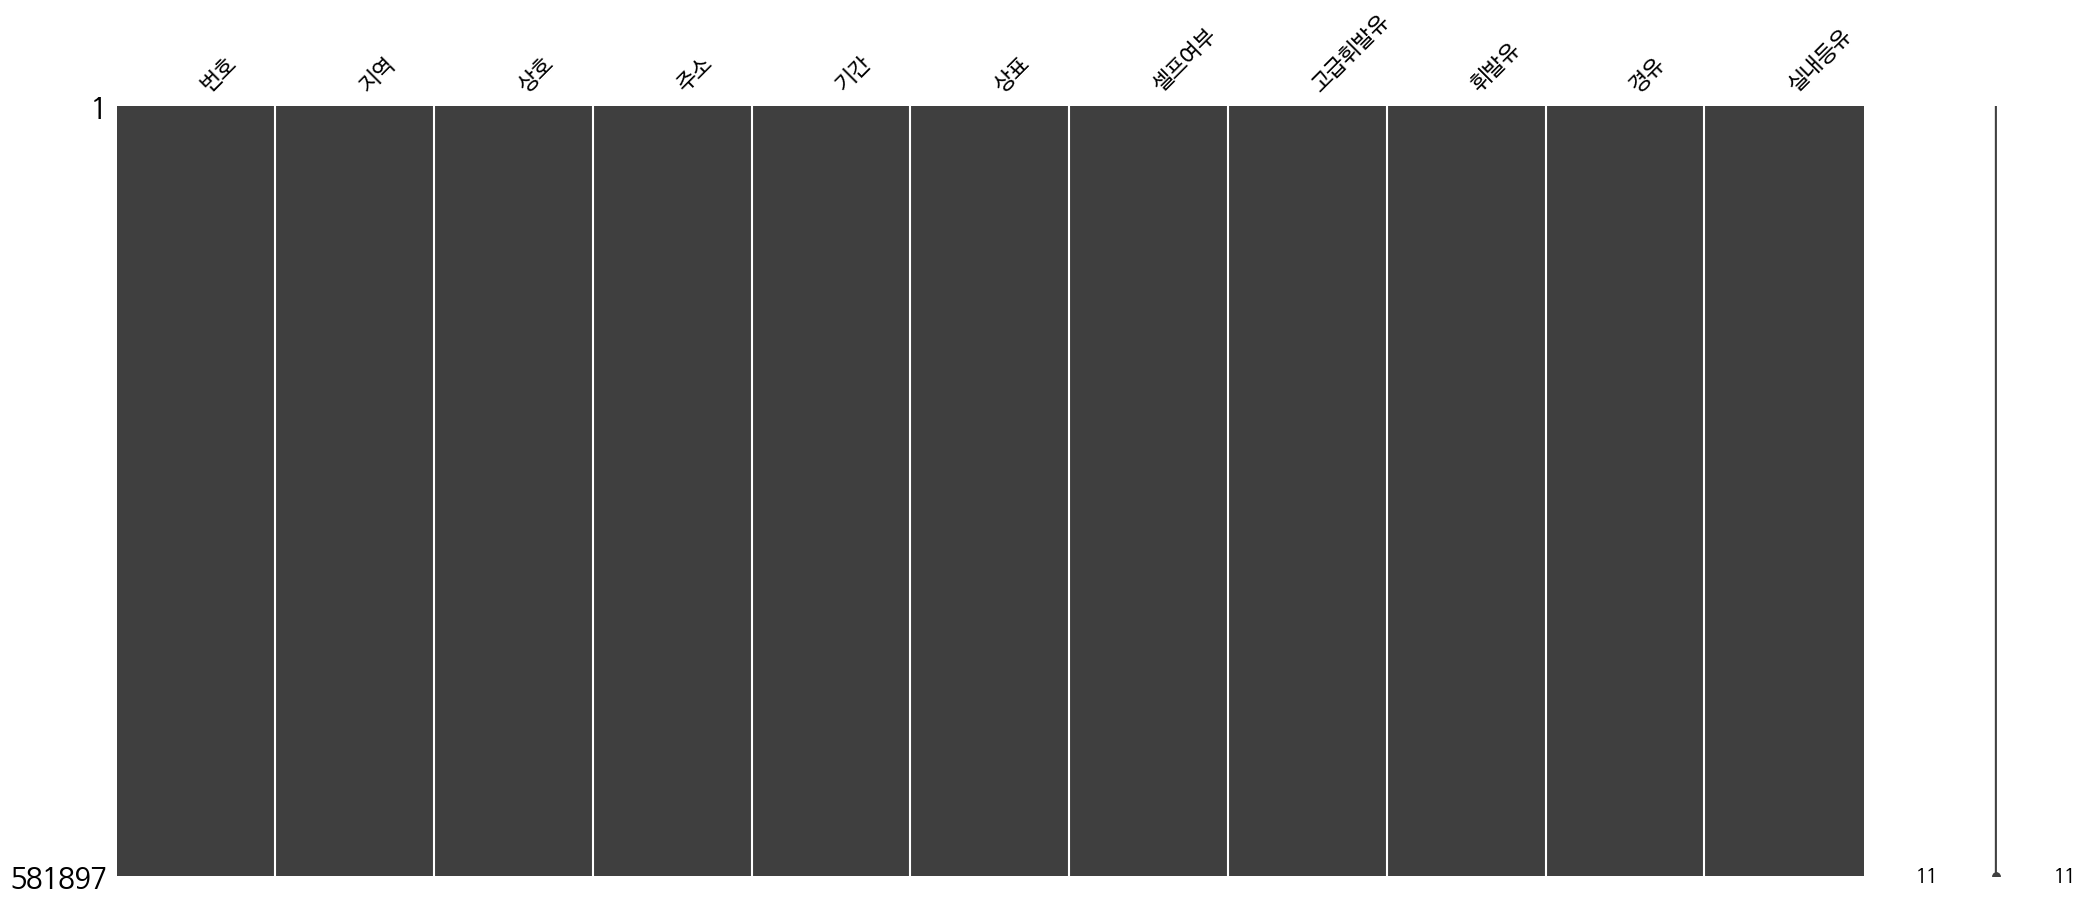

In [117]:
import missingno as msno
msno.matrix(tdf)

In [118]:
tdf['셀프여부'].unique()

array(['셀프', '일반'], dtype=object)

In [119]:
tdf['상표'].unique()

array(['HD현대오일뱅크', 'S-OIL', 'SK에너지', 'GS칼텍스', '알뜰(ex)', 'NH-OIL', '알뜰주유소',
       '자가상표', 'SK가스', 'NC오일', 'E1'], dtype=object)

In [120]:
tdf['상표'].value_counts()

,count
상표,
SK에너지,156325
HD현대오일뱅크,123904
GS칼텍스,115989
S-OIL,112456
NH-OIL,33987
알뜰주유소,21957
알뜰(ex),9736
자가상표,7439
NC오일,102


In [121]:
tdf.columns

Index(['번호', '지역', '상호', '주소', '기간', '상표', '셀프여부', '고급휘발유', '휘발유', '경유',
       '실내등유'],
      dtype='object')

In [122]:
tdf.dtypes

,0
번호,object
지역,object
상호,object
주소,object
기간,object
상표,object
셀프여부,object
고급휘발유,float64
휘발유,float64
경유,float64


#### 범주형 변수에 대해 종류와 개수를 각각 확인해보세요.

In [123]:
tdf['지역'].value_counts()

,count
지역,
경기 화성시,11961
충북 청주시,11552
경기 용인시,9991
경남 김해시,9342
경남 창원시,9268
...,...
대구 군위군,289
충남 계룡시,276
경기 과천시,187


In [124]:
tdf['상호'].value_counts()

,count
상호,
우리주유소,2395
대성주유소,1826
현대주유소,1606
중앙주유소,1459
행복주유소,1260
...,...
SK채움주유소,1
동일석유(주) 김포대로주유소,1
북부농협고제지점,1


In [125]:
tdf['주소'].value_counts()

,count
주소,
,1167
충남 당진시 신평면 서해안고속도로 275,106
경기 의왕시 오전로 24,105
경남 김해시 대동면 동남로 400,104
경기 화성시 송산면 평택시흥고속도로 25,104
...,...
부산 사하구 을숙도대로 767,1
전남 장흥군 장동면 흥성로 1490,1
경기 용인시 기흥구 진산로 116 (보정동),1


### 데이터 전처리

#### 0원 데이터 결측치로 변환

In [126]:
pd.pivot_table(tdf, index = '셀프여부', values = ['고급휘발유', '휘발유', '경유', '실내등유'], aggfunc = 'mean')

,경유,고급휘발유,실내등유,휘발유
셀프여부,,,,
셀프,1478.951772,302.367171,590.236588,1589.098851
일반,1509.252662,114.223523,954.257039,1614.240798


In [127]:
tdf.loc[tdf['고급휘발유']==0.00, '고급휘발유'] = np.nan
tdf.loc[tdf['휘발유']==0.00, '휘발유'] = np.nan
tdf.loc[tdf['경유']==0.00, '경유'] = np.nan
tdf.loc[tdf['실내등유']==0.00, '실내등유'] = np.nan

#### '지역'에서 '도'와 '시' 분리

In [128]:
tdf['지역'].unique()

array(['강원 강릉시', '강원 고성군', '강원 동해시', '강원 삼척시', '강원 속초시', '강원 양구군',
       '강원 양양군', '강원 영월군', '강원 원주시', '강원 인제군', '강원 정선군', '강원 철원군',
       '강원 춘천시', '강원 태백시', '강원 평창군', '강원 홍천군', '강원 화천군', '강원 횡성군',
       '경기 가평군', '경기 고양시', '경기 과천시', '경기 광명시', '경기 광주시', '경기 구리시',
       '경기 군포시', '경기 김포시', '경기 남양주시', '경기 동두천시', '경기 부천시', '경기 성남시',
       '경기 수원시', '경기 시흥시', '경기 안산시', '경기 안성시', '경기 안양시', '경기 양주시',
       '경기 양평군', '경기 여주시', '경기 연천군', '경기 오산시', '경기 용인시', '경기 의왕시',
       '경기 의정부시', '경기 이천시', '경기 파주시', '경기 평택시', '경기 포천시', '경기 하남시',
       '경기 화성시', '경남 거제시', '경남 거창군', '경남 고성군', '경남 김해시', '경남 남해군',
       '경남 밀양시', '경남 사천시', '경남 산청군', '경남 양산시', '경남 의령군', '경남 진주시',
       '경남 창녕군', '경남 창원시', '경남 통영시', '경남 하동군', '경남 함안군', '경남 함양군',
       '경남 합천군', '경북 경산시', '경북 경주시', '경북 고령군', '경북 구미시', '경북 김천시',
       '경북 문경시', '경북 봉화군', '경북 상주시', '경북 성주군', '경북 안동시', '경북 영덕군',
       '경북 영양군', '경북 영주시', '경북 영천시', '경북 예천군', '경북 울릉군', '경북 울진군',
       '경북 의성군', '경북 청도군', '경북 청송군', '경북 칠곡군', '경북 포항시', '광

In [129]:
def getsi(x):
    if len(x.split())==2:
        return x.split()[1]
    else:
        return x.split()[0]

In [130]:
tdf['도단위'] = tdf['지역'].apply(lambda x : x.split()[0])
tdf['시단위'] = tdf['지역'].apply(getsi)
tdf

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위
0,A0033584,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178(유천동),2024년 01월,HD현대오일뱅크,셀프,1767.84,1525.74,1432.23,NaN,강원,강릉시
1,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2024년 01월,S-OIL,셀프,NaN,1551.90,1477.90,1297.74,강원,강릉시
2,A0011408,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,2024년 01월,SK에너지,셀프,1760.00,1551.97,1454.23,NaN,강원,강릉시
3,A0010581,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475 (내곡동),2024년 01월,SK에너지,셀프,NaN,1506.29,1440.97,1252.42,강원,강릉시
4,A0011610,강원 강릉시,(주)삼보물류 삼보주유소,강원 강릉시 동해대로 3970,2024년 01월,S-OIL,일반,NaN,1568.00,1505.10,1400.00,강원,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581892,A0012886,충북 충주시,한양주유소,충북 충주시 살미면 유주막로 72,2023년 06월,HD현대오일뱅크,일반,NaN,1627.00,1422.37,1293.33,충북,충주시
581893,A0012787,충북 충주시,해운주유소,충북 충주시 갱고개로 44 (교현동),2023년 06월,SK에너지,셀프,NaN,1554.00,1392.07,1292.50,충북,충주시
581894,A0013152,충북 충주시,화령개발(주)공단주유소,충북 충주시 국원대로 368(목행동),2023년 06월,SK에너지,셀프,NaN,1659.00,1500.67,1350.00,충북,충주시
581895,A0016900,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,2023년 06월,GS칼텍스,셀프,NaN,1557.20,1379.00,1188.33,충북,충주시


#### '기간'에서 '년'과 '월' 분리

In [131]:
tdf['년'] = tdf['기간'].apply(lambda x : int(x.split()[0][:4]))
tdf['월'] = tdf['기간'].apply(lambda x : int(x.split()[1][:2]))
tdf

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월
0,A0033584,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178(유천동),2024년 01월,HD현대오일뱅크,셀프,1767.84,1525.74,1432.23,NaN,강원,강릉시,2024,1
1,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2024년 01월,S-OIL,셀프,NaN,1551.90,1477.90,1297.74,강원,강릉시,2024,1
2,A0011408,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,2024년 01월,SK에너지,셀프,1760.00,1551.97,1454.23,NaN,강원,강릉시,2024,1
3,A0010581,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475 (내곡동),2024년 01월,SK에너지,셀프,NaN,1506.29,1440.97,1252.42,강원,강릉시,2024,1
4,A0011610,강원 강릉시,(주)삼보물류 삼보주유소,강원 강릉시 동해대로 3970,2024년 01월,S-OIL,일반,NaN,1568.00,1505.10,1400.00,강원,강릉시,2024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581892,A0012886,충북 충주시,한양주유소,충북 충주시 살미면 유주막로 72,2023년 06월,HD현대오일뱅크,일반,NaN,1627.00,1422.37,1293.33,충북,충주시,2023,6
581893,A0012787,충북 충주시,해운주유소,충북 충주시 갱고개로 44 (교현동),2023년 06월,SK에너지,셀프,NaN,1554.00,1392.07,1292.50,충북,충주시,2023,6
581894,A0013152,충북 충주시,화령개발(주)공단주유소,충북 충주시 국원대로 368(목행동),2023년 06월,SK에너지,셀프,NaN,1659.00,1500.67,1350.00,충북,충주시,2023,6
581895,A0016900,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,2023년 06월,GS칼텍스,셀프,NaN,1557.20,1379.00,1188.33,충북,충주시,2023,6


#### 시계열 데이터 변수 추가

In [132]:
tdf['일시'] = pd.to_datetime(tdf['기간'], format='%Y년 %m월')
tdf

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
0,A0033584,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178(유천동),2024년 01월,HD현대오일뱅크,셀프,1767.84,1525.74,1432.23,NaN,강원,강릉시,2024,1,2024-01-01
1,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2024년 01월,S-OIL,셀프,NaN,1551.90,1477.90,1297.74,강원,강릉시,2024,1,2024-01-01
2,A0011408,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,2024년 01월,SK에너지,셀프,1760.00,1551.97,1454.23,NaN,강원,강릉시,2024,1,2024-01-01
3,A0010581,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475 (내곡동),2024년 01월,SK에너지,셀프,NaN,1506.29,1440.97,1252.42,강원,강릉시,2024,1,2024-01-01
4,A0011610,강원 강릉시,(주)삼보물류 삼보주유소,강원 강릉시 동해대로 3970,2024년 01월,S-OIL,일반,NaN,1568.00,1505.10,1400.00,강원,강릉시,2024,1,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581892,A0012886,충북 충주시,한양주유소,충북 충주시 살미면 유주막로 72,2023년 06월,HD현대오일뱅크,일반,NaN,1627.00,1422.37,1293.33,충북,충주시,2023,6,2023-06-01
581893,A0012787,충북 충주시,해운주유소,충북 충주시 갱고개로 44 (교현동),2023년 06월,SK에너지,셀프,NaN,1554.00,1392.07,1292.50,충북,충주시,2023,6,2023-06-01
581894,A0013152,충북 충주시,화령개발(주)공단주유소,충북 충주시 국원대로 368(목행동),2023년 06월,SK에너지,셀프,NaN,1659.00,1500.67,1350.00,충북,충주시,2023,6,2023-06-01
581895,A0016900,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,2023년 06월,GS칼텍스,셀프,NaN,1557.20,1379.00,1188.33,충북,충주시,2023,6,2023-06-01


In [133]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581897 entries, 0 to 581896
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      581897 non-null  object        
 1   지역      581897 non-null  object        
 2   상호      581897 non-null  object        
 3   주소      581897 non-null  object        
 4   기간      581897 non-null  object        
 5   상표      581897 non-null  object        
 6   셀프여부    581897 non-null  object        
 7   고급휘발유   65627 non-null   float64       
 8   휘발유     580084 non-null  float64       
 9   경유      581726 non-null  float64       
 10  실내등유    379696 non-null  float64       
 11  도단위     581897 non-null  object        
 12  시단위     581897 non-null  object        
 13  년       581897 non-null  int64         
 14  월       581897 non-null  int64         
 15  일시      581897 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 71.0+ 

### 데이터 분석 및 시각화

#### 년월별 유가 변동 알아보기
- 범주형 변수와 수치형 변수 간의 분석
- 범주형 변수에 대해 그룹화하고 그룹별 소계를 구함
- groupby() 함수 사용 후 min(), max(), count(), mean(), sum(), median() 등 적용
- 시각화 방법 : 데이터에 따라 line plot 또는 bar plot을 적용

In [134]:
oilprice_df = tdf[['년', '월', '고급휘발유', '휘발유', '경유', '실내등유']].groupby(['년', '월']).mean()
oilprice_df

고급휘발유          휘발유           경유         실내등유
년    월                                                     
2020 1   1832.945973  1568.328192  1398.231421   975.541322
     2   1817.317004  1545.230095  1369.692120   968.274166
     3   1767.672866  1469.059309  1280.637962   934.645056
     4   1648.131164  1323.774689  1132.436064   861.366440
     5   1582.461902  1255.205138  1065.814662   804.563271
     6   1610.587004  1322.855255  1127.751046   808.928839
     7   1633.936189  1360.216044  1162.773262   819.968502
     8   1637.273957  1361.009103  1163.385495   823.340627
     9   1629.433362  1352.352462  1154.293285   823.355123
     10  1618.632789  1333.138825  1133.747107   815.414625
     11  1609.799551  1319.527037  1119.482625   803.488993
     12  1630.919888  1367.737273  1168.231666   819.041055
2021 1   1679.396623  1441.730997  1242.182143   864.789171
     2   1703.683623  1463.187735  1263.316286   879.186591
     3   1750.869460  1513.066210  1312.398344   898.388394
     4   1770.891227  1534.491608  1332.697725   907.169977
     5   1779.655312  1541.324371  1338.690859   908.725664
     6   1810.475114  1577.174212  1374.212966   916.634690
     7   1859.365074  1628.888682  1425.253050   934.504291
     8   1879.406865  1645.520080  1440.316244   944.019144
     9   1877.544892  1642.460044  1437.052804   945.453426
     10  1937.414213  1711.976002  1509.070368   994.831594
     11  1945.952891  1737.230553  1549.622765  1087.627711
     12  1872.620673  1646.377066  1468.792326  1094.599537
2022 1   1873.706239  1635.388557  1453.586580  1098.232360
     2   1936.153861  1714.571641  1536.545211  1170.790051
     3   2152.160689  1937.934695  1826.301028  1345.181054
     4   2194.337452  1976.775856  1906.664663  1426.669460
     5   2184.257870  1967.082999  1964.049613  1478.292082
     6   2299.739786  2083.883721  2088.835631  1598.652816
     7   2260.846908  2030.240064  2084.954927  1684.081966
     8   2076.940947  1792.552866  1889.362112  1643.366646
     9   2016.320876  1730.198900  1850.084749  1621.241193
     10  1955.628413  1666.778959  1838.294256  1598.762932
     11  1935.766881  1650.359307  1879.009561  1601.384261
     12  1864.948813  1564.062272  1783.343318  1552.753592
2023 1   1852.843934  1562.992316  1675.501762  1495.689769
     2   1852.401007  1578.470121  1606.328423  1465.331482
     3   1855.857253  1592.177000  1539.728669  1427.647473
     4   1893.466795  1640.910436  1535.615453  1405.946772
     5   1888.090464  1628.844526  1471.964201  1382.537564
     6   1856.610129  1580.586819  1394.412285  1343.335040
     7   1857.813691  1585.549626  1396.469844  1324.104181
     8   1953.774740  1716.491219  1572.815323  1344.493929
     9   1999.784689  1769.069194  1666.382328  1393.402613
     10  2009.871491  1775.983769  1690.357707  1434.607385
     11  1950.223820  1684.174311  1628.230041  1426.972666
     12  1881.174637  1600.610928  1526.363758  1389.883961
2024 1   1853.900371  1569.416718  1480.107514  1360.113129
     2   1883.286353  1614.585981  1517.722156  1361.626300
     3   1897.402415  1639.129243  1538.924054  1366.591600
     4   1935.051710  1687.699374  1557.689938  1369.264509

<Axes: xlabel='년,월'>

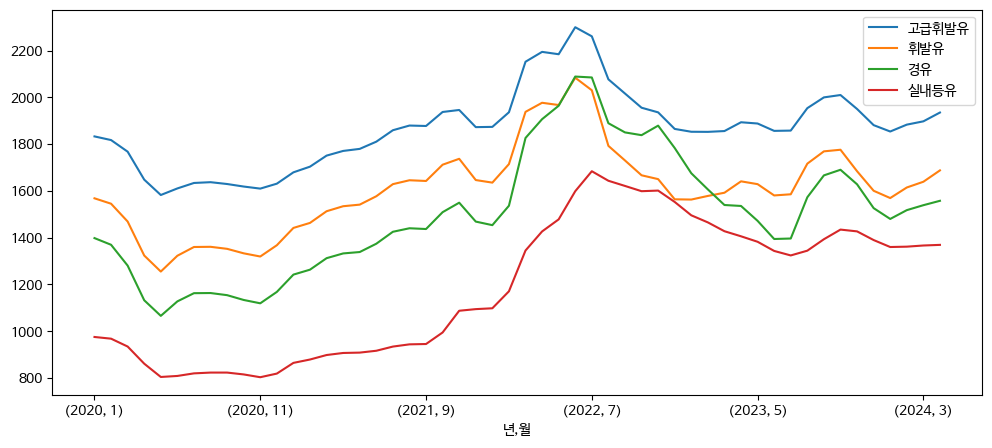

In [135]:
oilprice_df.plot(figsize=(12,5))

#### '도단위'별 평균가격 알아보기

In [136]:
do_df = tdf[['도단위', '고급휘발유', '휘발유', '경유', '실내등유']].groupby(['도단위']).mean()
do_df

,고급휘발유,휘발유,경유,실내등유
도단위,,,,
강원,1869.263850,1616.346899,1508.348770,1138.299548
경기,1867.071926,1612.290152,1498.584353,1208.787511
경남,1870.675165,1590.444971,1478.923729,1170.332598
경북,1868.540017,1591.908312,1478.110067,1148.176162
광주,1830.632785,1587.300549,1474.253711,1223.425876
대구,1869.241822,1572.785244,1460.400020,1206.272808
대전,1855.620587,1592.832648,1484.165995,1194.651346
부산,1862.184414,1585.136010,1470.819067,1219.319839
서울,1959.058677,1681.775355,1573.822295,1350.794610


<Axes: xlabel='도단위'>

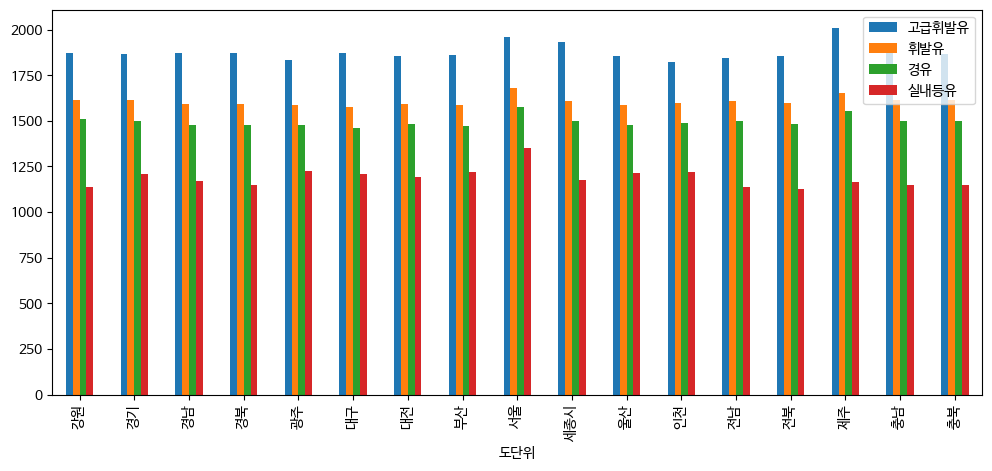

In [137]:
do_df.plot(kind='bar', figsize=(12,5))

#### [Quiz1] '상표'별 평균가격을 확인하고 시각화 해보세요.

In [138]:
brand_avg_prices = tdf[['상표', '고급휘발유', '휘발유', '경유', '실내등유']].groupby('상표').mean()
brand_avg_prices

,고급휘발유,휘발유,경유,실내등유
상표,,,,
E1,NaN,1490.000000,1275.000000,NaN
GS칼텍스,1865.926167,1611.734514,1499.248499,1181.604202
HD현대오일뱅크,1884.479324,1607.832622,1496.122510,1176.175926
NC오일,NaN,1446.306000,1271.478725,867.320896
NH-OIL,1856.653590,1598.346960,1492.065955,1137.079709
S-OIL,1876.326498,1606.584241,1493.640342,1176.446685
SK가스,NaN,1317.000000,1097.000000,NaN
SK에너지,1900.664500,1611.781583,1498.628749,1178.455504
알뜰(ex),1878.578551,1560.252676,1452.809942,NaN


<Axes: xlabel='상표'>

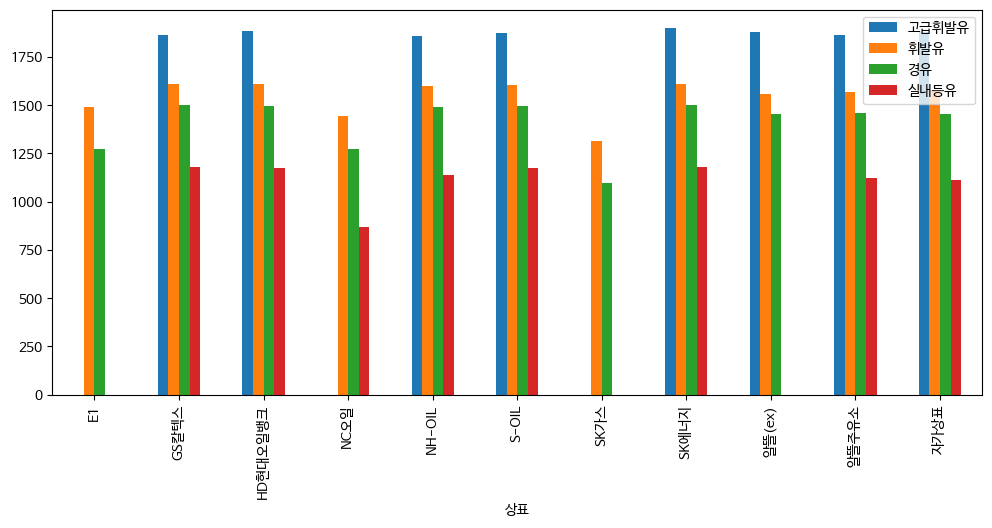

In [139]:
brand_avg_prices.plot(kind='bar', figsize=(12,5))

#### [Quiz2] '셀프여부'별 평균가격을 확인하고 시각화 해보세요.

In [140]:
self_avg_prices = tdf[['셀프여부', '고급휘발유', '휘발유', '경유', '실내등유']].groupby('셀프여부').mean()
self_avg_prices

,고급휘발유,휘발유,경유,실내등유
셀프여부,,,,
셀프,1858.490055,1590.859029,1479.142298,1177.924945
일반,1947.962256,1622.833989,1509.966742,1168.317242


<Axes: xlabel='셀프여부'>

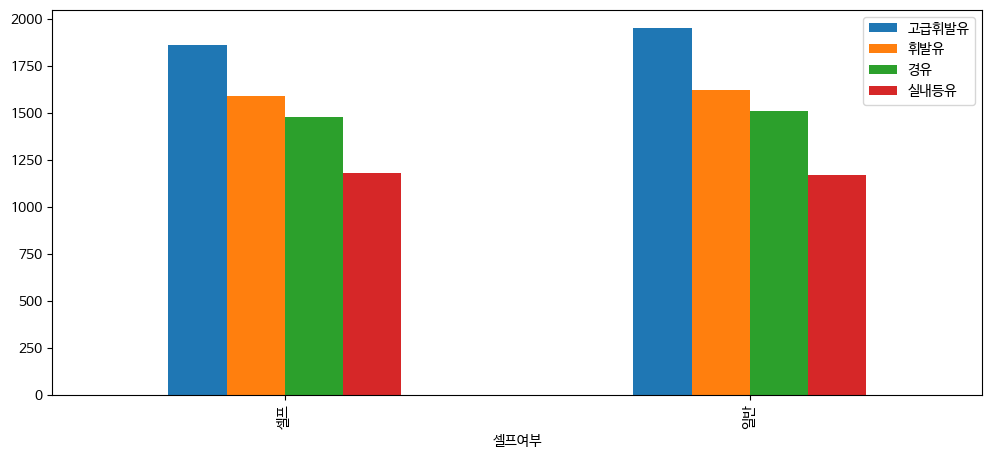

In [141]:
self_avg_prices.plot(kind='bar', figsize=(12,5))

#### [Qiuz3] '상표별' 휘발유 평균가격을 알아보고 시각화 해보세요.

In [142]:
brand_oil_prices = tdf[['상표','휘발유']].groupby('상표').mean()
brand_oil_prices

,휘발유
상표,
E1,1490.000000
GS칼텍스,1611.734514
HD현대오일뱅크,1607.832622
NC오일,1446.306000
NH-OIL,1598.346960
S-OIL,1606.584241
SK가스,1317.000000
SK에너지,1611.781583
알뜰(ex),1560.252676


<Axes: xlabel='상표'>

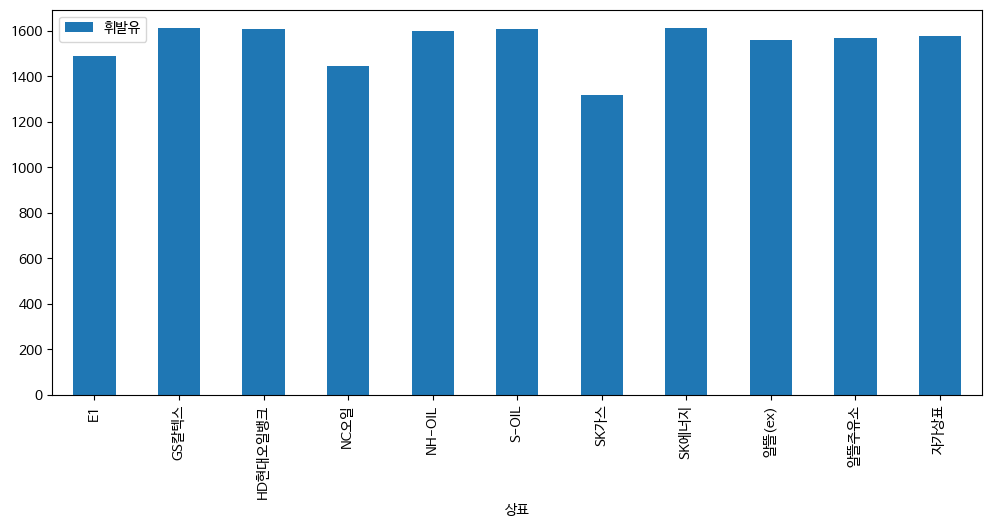

In [143]:
brand_oil_prices.plot(kind='bar', figsize=(12,5))

#### 특정 상호의 유가 변동 알아보기
- DataFrame[조건] 을 이용하면 조건에 해당하는 데이터만 필터링 가능

In [144]:
plot_data = tdf[tdf['상호']=='(주)대성길']
plot_data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
1,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2024년 01월,S-OIL,셀프,NaN,1551.90,1477.90,1297.74,강원,강릉시,2024,1,2024-01-01
10887,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020년 11월,S-OIL,셀프,NaN,1285.40,1109.80,720.00,강원,강릉시,2020,11,2020-11-01
22354,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2022년 09월,S-OIL,셀프,NaN,1705.63,1841.33,1630.67,강원,강릉시,2022,9,2022-09-01
33433,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2023년 04월,S-OIL,셀프,NaN,1617.33,1536.00,1300.00,강원,강릉시,2023,4,2023-04-01
44419,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2021년 07월,S-OIL,셀프,NaN,1611.19,1414.35,898.75,강원,강릉시,2021,7,2021-07-01


In [145]:
plot_data.set_index('일시', inplace=True)
plot_data.sort_index(inplace=True)
plot_data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월
일시,,,,,,,,,,,,,,,
2020-01-01,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020년 01월,S-OIL,셀프,NaN,1528.65,1380.48,900.00,강원,강릉시,2020,1
2020-02-01,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020년 02월,S-OIL,셀프,NaN,1514.07,1363.93,882.07,강원,강릉시,2020,2
2020-03-01,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020년 03월,S-OIL,셀프,NaN,1459.48,1281.74,831.29,강원,강릉시,2020,3
2020-04-01,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020년 04월,S-OIL,셀프,NaN,1321.33,1122.47,722.50,강원,강릉시,2020,4
2020-05-01,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2020년 05월,S-OIL,셀프,NaN,1227.58,1036.87,607.42,강원,강릉시,2020,5


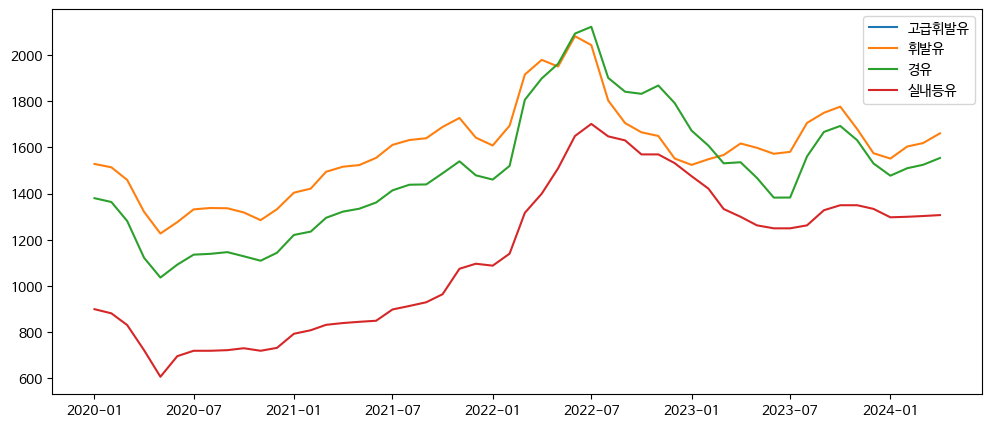

In [146]:
plt.figure(figsize=(12,5))
plt.plot(plot_data['고급휘발유'], label='고급휘발유')
plt.plot(plot_data['휘발유'], label='휘발유')
plt.plot(plot_data['경유'], label='경유')
plt.plot(plot_data['실내등유'], label='실내등유')
plt.legend()

<Axes: xlabel='일시'>

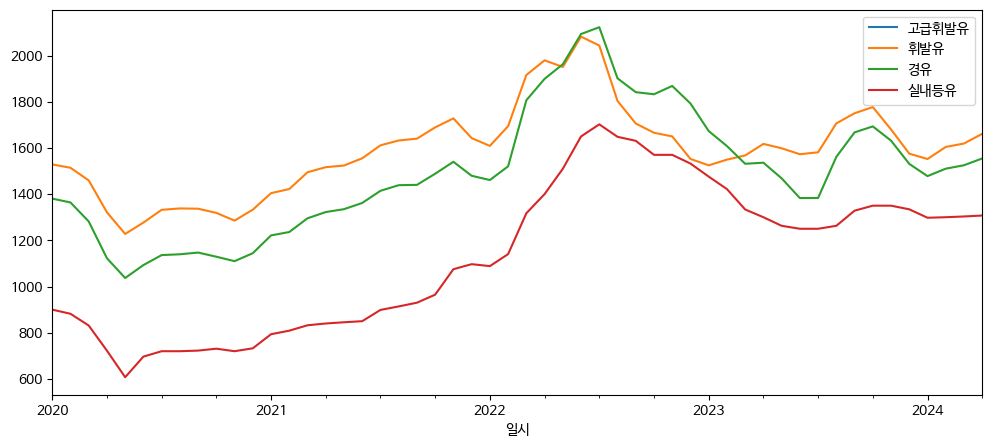

In [147]:
plot_data[['고급휘발유', '휘발유', '경유', '실내등유']].plot(figsize=(12,5))

#### 울산('도단위') 에서 휘발유 평균 가격이 가장 낮은 주유소 상호는 무엇일까요?

In [148]:
ulsan_data = tdf[tdf['도단위']=='울산']
ulsan_data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
6818,A0029047,울산 남구,(주)대양씨앤씨 평창주유소,울산 남구 돋질로 297,2024년 01월,GS칼텍스,셀프,NaN,1493.19,1389.19,NaN,울산,남구,2024,1,2024-01-01
6819,A0029072,울산 남구,(주)삼양주유소,울산 남구 장생포로 79 (여천동),2024년 01월,HD현대오일뱅크,일반,NaN,1569.77,1482.39,1518.39,울산,남구,2024,1,2024-01-01
6820,A0029185,울산 남구,(주)일광주유소,울산 남구 산업로 93,2024년 01월,GS칼텍스,셀프,NaN,1496.94,1406.81,NaN,울산,남구,2024,1,2024-01-01
6821,A0029135,울산 남구,(주)종하아이앤씨 문수로주유소,울산 남구 문수로 427 (신정동),2024년 01월,S-OIL,셀프,1897.0,1592.16,1517.65,1600.00,울산,남구,2024,1,2024-01-01
6822,A0029065,울산 남구,(주)좋은기름나라 금강주유소지점,울산 남구 상개로 214 (상개동),2024년 01월,S-OIL,셀프,NaN,1567.58,1409.90,1600.00,울산,남구,2024,1,2024-01-01


In [149]:
ulsan_data[['상호', '휘발유']].groupby('상호').mean().sort_values('휘발유')

,휘발유
상호,
허고개주유소,1336.264615
나들목주유소,1403.955882
은월주유소,1424.120000
한우리주유소,1438.791875
곡천주유소,1440.894545
...,...
동운주유소,1684.381731
남운주유소,1689.594808
신오주유소,1696.429038


#### 2024년 4월 기준 울산에서 경유 가격이 가장 높은곳과 낮은곳의 상호는 무엇일까요?

In [150]:
ulsan_data2 = tdf[(tdf['년']==2024)&(tdf['월']==4)&(tdf['도단위']=='울산')]
ulsan_data2

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
432227,A0029047,울산 남구,(주)대양씨앤씨 평창주유소,울산 남구 돋질로 297,2024년 04월,GS칼텍스,셀프,NaN,1633.30,1498.83,NaN,울산,남구,2024,4,2024-04-01
432228,A0029072,울산 남구,(주)삼양주유소,울산 남구 장생포로 79 (여천동),2024년 04월,HD현대오일뱅크,일반,NaN,1678.50,1554.33,1530.43,울산,남구,2024,4,2024-04-01
432229,A0029185,울산 남구,(주)일광주유소,울산 남구 산업로 93,2024년 04월,GS칼텍스,셀프,NaN,1623.93,1497.67,NaN,울산,남구,2024,4,2024-04-01
432230,A0029135,울산 남구,(주)종하아이앤씨 문수로주유소,울산 남구 문수로 427 (신정동),2024년 04월,S-OIL,셀프,1997.47,1698.80,1575.73,1600.00,울산,남구,2024,4,2024-04-01
432231,A0029065,울산 남구,(주)좋은기름나라 금강주유소지점,울산 남구 상개로 214 (상개동),2024년 04월,S-OIL,셀프,NaN,1664.33,1500.00,1600.00,울산,남구,2024,4,2024-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432448,A0033389,울산 중구,지에스칼텍스㈜ 혁신도시주유소,울산 중구 종가로 406-36,2024년 04월,GS칼텍스,셀프,1896.73,1674.33,1542.17,1500.00,울산,중구,2024,4,2024-04-01
432449,A0031510,울산 중구,차세대주유소(주),울산 중구 구교로 170 (반구동),2024년 04월,GS칼텍스,셀프,NaN,1632.67,1481.67,1316.67,울산,중구,2024,4,2024-04-01
432450,A0031498,울산 중구,하나주유소,울산 중구 가구거리 85 (반구동),2024년 04월,SK에너지,일반,NaN,1648.67,1503.43,1399.00,울산,중구,2024,4,2024-04-01
432451,A0031688,울산 중구,함월셀프주유소,울산 중구 성안로 135 (성안동),2024년 04월,HD현대오일뱅크,셀프,2005.33,1701.20,1578.67,1550.00,울산,중구,2024,4,2024-04-01


In [151]:
ulsan_data2['경유'].min(), ulsan_data2['경유'].max()

(1462.1, 1783.0)

In [152]:
ulsan_data2[ulsan_data2['경유']==ulsan_data2['경유'].min()]

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
432299,A0031550,울산 북구,(주)아성통상 아성울산1직영주유소,울산 북구 산업로 1707 (중산동),2024년 04월,GS칼텍스,셀프,NaN,1610.7,1462.1,NaN,울산,북구,2024,4,2024-04-01


In [153]:
ulsan_data2[ulsan_data2['경유']==ulsan_data2['경유'].max()]

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
432291,A0031513,울산 동구,동주유소,울산 동구 방어진순환도로 431 (방어동),2024년 04월,GS칼텍스,일반,NaN,1835.0,1783.0,NaN,울산,동구,2024,4,2024-04-01


#### [**Quiz4**] 2023년 11월 기준 서울에서 셀프주유소 중 휘발유 가격이 가장 높은곳과 낮은곳의 상호는 무엇일까요?

In [154]:
seoul_data1= tdf[(tdf['년']==2023)&(tdf['월']==11)&(tdf['도단위']=='서울')]
seoul_data1

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
263234,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2023년 11월,SK에너지,셀프,2048.00,1818.00,1777.00,NaN,서울,강남구,2023,11,2023-11-01
263235,A0000525,서울 강남구,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2023년 11월,GS칼텍스,일반,2838.00,2598.00,2560.00,1842.37,서울,강남구,2023,11,2023-11-01
263236,A0001219,서울 강남구,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2023년 11월,SK에너지,셀프,NaN,1710.73,1639.83,NaN,서울,강남구,2023,11,2023-11-01
263237,A0009061,서울 강남구,(주)선진도곡주유소,서울 강남구 도곡로 162 (도곡동),2023년 11월,S-OIL,일반,1983.23,1813.40,1734.40,NaN,서울,강남구,2023,11,2023-11-01
263238,A0001217,서울 강남구,(주)소모 쎈트럴주유소,서울 강남구 삼성로 335,2023년 11월,GS칼텍스,일반,2423.33,2233.33,2173.67,1650.00,서울,강남구,2023,11,2023-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263665,A0004216,서울 중랑구,신내주유소,서울 중랑구 용마산로 705 (신내동),2023년 11월,SK에너지,셀프,NaN,1696.67,1627.17,1600.00,서울,중랑구,2023,11,2023-11-01
263666,A0010071,서울 중랑구,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),2023년 11월,SK에너지,셀프,NaN,1781.93,1706.27,1650.00,서울,중랑구,2023,11,2023-11-01
263667,A0032696,서울 중랑구,오천만주유소,서울 중랑구 동일로 547 (면목동),2023년 11월,S-OIL,셀프,NaN,1650.67,1571.00,NaN,서울,중랑구,2023,11,2023-11-01
263668,A0010081,서울 중랑구,용마로주유소,서울 중랑구 용마산로 309 (면목동),2023년 11월,SK에너지,셀프,NaN,1754.67,1673.67,1600.00,서울,중랑구,2023,11,2023-11-01


In [155]:
seoul_data1_min=seoul_data1[seoul_data1['휘발유']==seoul_data1['휘발유'].min()]
seoul_data1_min

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
263352,A0000854,서울 구로구,(주)서울에너지 궁동주유소,서울 구로구 오리로 1299 (궁동),2023년 11월,HD현대오일뱅크,셀프,1900.67,1599.07,1562.47,NaN,서울,구로구,2023,11,2023-11-01


In [156]:
seoul_data1_max=seoul_data1[seoul_data1['휘발유']==seoul_data1['휘발유'].max()]
seoul_data1_max

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
263650,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2023년 11월,SK에너지,일반,3073.83,2673.83,2637.53,2260.77,서울,중구,2023,11,2023-11-01


#### [**Quiz5**] 2024년 1월 기준 알뜰주유소가 가장 많은 도는 어디일까요? 경남에서 알뜰주유소가 가장 많은 시는 어디일까요?

In [157]:
cheep_data1= tdf[(tdf['상표']=='알뜰주유소')]
cheep_data1

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
50,A0011488,강원 강릉시,솔향주유소,강원 강릉시 공제로437번길 1 (홍제동),2024년 01월,알뜰주유소,셀프,NaN,1495.74,1408.42,NaN,강원,강릉시,2024,1,2024-01-01
120,A0010566,강원 동해시,북삼주유소,강원 동해시 효자로 636,2024년 01월,알뜰주유소,셀프,NaN,1520.13,1448.35,NaN,강원,동해시,2024,1,2024-01-01
218,A0011326,강원 영월군,수라주식회사,강원 영월군 중동면 영월로 3730,2024년 01월,알뜰주유소,일반,NaN,1570.00,1480.00,1250.00,강원,영월군,2024,1,2024-01-01
260,A0011141,강원 원주시,㈜행복드림주유소,강원 원주시 호저면 원문로 402,2024년 01월,알뜰주유소,셀프,NaN,1537.39,1457.39,1322.26,강원,원주시,2024,1,2024-01-01
281,A0010994,강원 원주시,동명주유소,강원 원주시 치악로 2090 (태장동),2024년 01월,알뜰주유소,셀프,NaN,1532.61,1451.97,1266.13,강원,원주시,2024,1,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581787,A0012423,충북 청주시,코리아에너지(주),충북 청주시 청원구 공항로 235,2023년 06월,알뜰주유소,셀프,1799.0,1549.67,1363.67,NaN,충북,청주시,2023,6,2023-06-01
581797,A0012241,충북 청주시,평양주유소,충북 청주시 서원구 사운로 69 (사직동),2023년 06월,알뜰주유소,셀프,NaN,1524.60,1344.60,NaN,충북,청주시,2023,6,2023-06-01
581812,A0013188,충북 충주시,(주)서림주유소,충북 충주시 형설로 102 (용산동),2023년 06월,알뜰주유소,셀프,NaN,1552.00,1352.00,1200.00,충북,충주시,2023,6,2023-06-01
581849,A0012814,충북 충주시,만남주유소,충북 충주시 금가면 충원대로 1419,2023년 06월,알뜰주유소,일반,NaN,1553.67,1348.00,1250.00,충북,충주시,2023,6,2023-06-01


In [158]:
altteul_counts = cheep_data1['도단위'].value_counts()
altteul_counts

,count
도단위,
경기,3849
경남,3084
충북,2180
전북,1832
경북,1815
전남,1456
충남,1375
부산,1281
대구,1056


In [159]:
altteul_counts[[0]]

,count
도단위,
경기,3849


In [160]:
cheep_genum_data1=cheep_data1[(tdf['도단위']=='경남')]
cheep_genum_data1

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시
2947,A0029561,경남 거제시,사등주유소,경남 거제시 사등면 거제대로 5486,2024년 01월,알뜰주유소,셀프,1880.0,1509.84,1409.84,NaN,경남,거제시,2024,1,2024-01-01
3018,A0029495,경남 고성군,봉현주유소,경남 고성군 하이면 삼상로 578,2024년 01월,알뜰주유소,셀프,NaN,1508.68,1409.00,1322.58,경남,고성군,2024,1,2024-01-01
3033,A0029634,경남 고성군,터미널주유소,경남 고성군 고성읍 송학고분로 349,2024년 01월,알뜰주유소,셀프,1995.0,1499.26,1391.23,1267.74,경남,고성군,2024,1,2024-01-01
3072,A0032947,경남 김해시,골든루트주유소,경남 김해시 주촌면 골든루트로 191,2024년 01월,알뜰주유소,셀프,NaN,1521.16,1443.10,NaN,경남,김해시,2024,1,2024-01-01
3122,A0030283,경남 김해시,무척산주유소,경남 김해시 생림면 생림대로 1010,2024년 01월,알뜰주유소,일반,NaN,1512.58,1413.87,1346.77,경남,김해시,2024,1,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574843,A0028490,경남 함안군,청남제2주유소,경남 함안군 칠서면 삼칠로 306,2023년 06월,알뜰주유소,셀프,NaN,1519.00,1330.33,1253.33,경남,함안군,2023,6,2023-06-01
574850,A0028266,경남 함안군,함마대로주유소,경남 함안군 산인면 함마대로 2035,2023년 06월,알뜰주유소,셀프,NaN,1510.37,1322.07,NaN,경남,함안군,2023,6,2023-06-01
574853,A0028381,경남 함안군,희승주유소,경남 함안군 군북면 장백로 386,2023년 06월,알뜰주유소,셀프,NaN,1514.00,1332.00,NaN,경남,함안군,2023,6,2023-06-01
574856,A0029208,경남 함양군,(주)알뜰함양주유소,경남 함양군 함양읍 함양로 804,2023년 06월,알뜰주유소,셀프,NaN,1545.00,1365.00,1170.00,경남,함양군,2023,6,2023-06-01


In [161]:
cheep_genum_counts = cheep_genum_data1['시단위'].value_counts()
cheep_genum_counts

,count
시단위,
창원시,615
김해시,412
진주시,358
사천시,276
양산시,240
산청군,167
밀양시,166
함안군,158
고성군,149


In [162]:
cheep_genum_counts[[0]]

,count
시단위,
창원시,615


#### '상표'별 셀프 주유소와 일반 주유소의 비율 알아보기
- crosstab : 범주형 변수 또는 이산형 변수 간의 관계를 분석할때 유용한 방법
- (속성) normalize :
    * True - 백분율로 표기
    * 'index' - 행 기준 백분율
    * 'columns' - 열 기준 백분율
- 시각화 방법 : heatmap

In [163]:
pd.crosstab(tdf['상표'], tdf['셀프여부'])

셀프여부,셀프,일반
상표,,
E1,0,1
GS칼텍스,61442,54547
HD현대오일뱅크,59587,64317
NC오일,29,73
NH-OIL,8557,25430
S-OIL,63248,49208
SK가스,1,0
SK에너지,80978,75347
알뜰(ex),9099,637


In [164]:
pd.crosstab(tdf['상표'], tdf['셀프여부'], normalize=True)

셀프여부,셀프,일반
상표,,
E1,0.000000,0.000002
GS칼텍스,0.105589,0.093740
HD현대오일뱅크,0.102401,0.110530
NC오일,0.000050,0.000125
NH-OIL,0.014705,0.043702
S-OIL,0.108693,0.084565
SK가스,0.000002,0.000000
SK에너지,0.139162,0.129485
알뜰(ex),0.015637,0.001095


In [165]:
ct_df = pd.crosstab(tdf['상표'], tdf['셀프여부'], normalize='index')
ct_df

셀프여부,셀프,일반
상표,,
E1,0.000000,1.000000
GS칼텍스,0.529723,0.470277
HD현대오일뱅크,0.480913,0.519087
NC오일,0.284314,0.715686
NH-OIL,0.251773,0.748227
S-OIL,0.562424,0.437576
SK가스,1.000000,0.000000
SK에너지,0.518011,0.481989
알뜰(ex),0.934573,0.065427


<Axes: xlabel='셀프여부', ylabel='상표'>

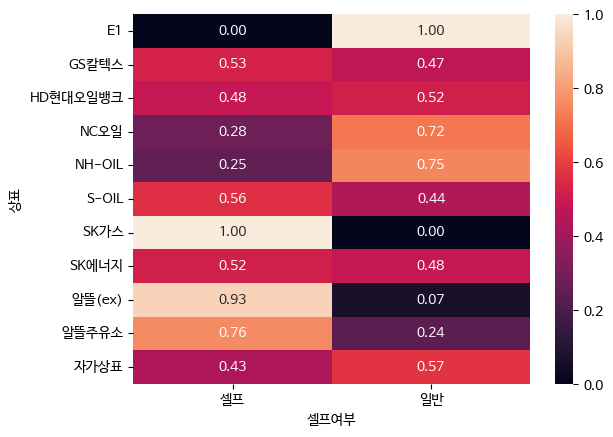

In [166]:
sns.heatmap(ct_df, annot = True, fmt = '.2f')

#### '상표'별 도단위 분포 비율 알아보기

In [167]:
brand_do_df = pd.crosstab(tdf['상표'], tdf['도단위'], normalize='index')
brand_do_df

도단위,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종시,울산,인천,전남,전북,제주,충남,충북
상표,,,,,,,,,,,,,,,,,
E1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GS칼텍스,0.056954,0.223081,0.094906,0.083715,0.022252,0.040745,0.022123,0.038142,0.052186,0.005311,0.016053,0.033417,0.073145,0.086137,0.020890,0.075171,0.055773
HD현대오일뱅크,0.055180,0.218056,0.090675,0.085066,0.024511,0.022187,0.026246,0.032517,0.048497,0.006949,0.021767,0.031032,0.072459,0.063339,0.012090,0.116267,0.073161
NC오일,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264706,0.735294,0.000000,0.000000,0.000000
NH-OIL,0.097626,0.096390,0.119428,0.170565,0.004619,0.009680,0.004149,0.004355,0.000000,0.008415,0.004590,0.005208,0.164151,0.111131,0.029776,0.120634,0.049284
S-OIL,0.052687,0.178808,0.099799,0.144857,0.027842,0.042150,0.020230,0.034680,0.036503,0.005158,0.026633,0.024418,0.075034,0.069663,0.013516,0.087101,0.060922
SK가스,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SK에너지,0.057547,0.247836,0.084548,0.111185,0.025108,0.026144,0.016798,0.039194,0.046762,0.005469,0.023656,0.036098,0.065812,0.066854,0.017809,0.073686,0.055493
알뜰(ex),0.102506,0.116783,0.118324,0.190222,0.000000,0.023418,0.005341,0.000000,0.005341,0.000000,0.013763,0.000000,0.089154,0.106409,0.000000,0.101376,0.127362


<Axes: xlabel='도단위', ylabel='상표'>

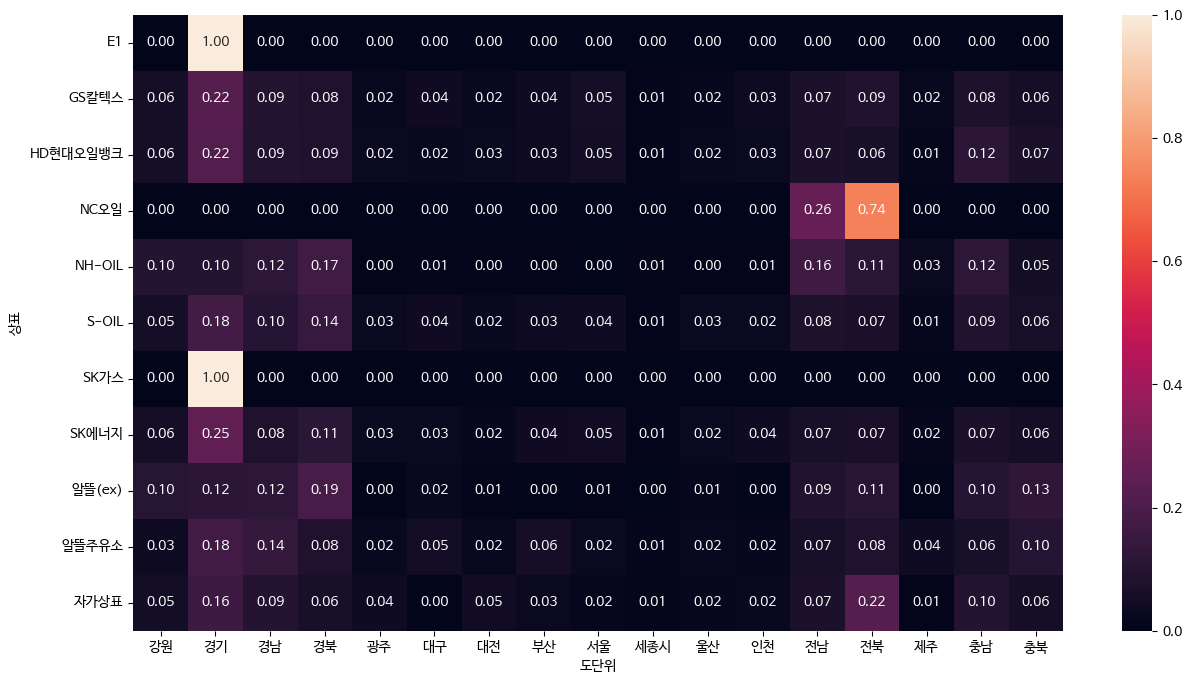

In [168]:
plt.figure(figsize=(15,8))
sns.heatmap(brand_do_df, annot = True, fmt = '.2f')

#### [**Quiz6**] 2024년 4월 기준 울산(도단위)의 구(시단위)별 상표의 분포 비율 비율 알아보기

In [192]:
ulsan_april = tdf[(tdf['년'] == 2024) & (tdf['월'] == 4) & (tdf['도단위'] == '울산')]
ulsan_april

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시,휘발유_경유_가격차이,휘발유_실내등유_가격차이
432227,A0029047,울산 남구,(주)대양씨앤씨 평창주유소,울산 남구 돋질로 297,2024년 04월,GS칼텍스,셀프,NaN,1633.30,1498.83,NaN,울산,남구,2024,4,2024-04-01,134.47,NaN
432228,A0029072,울산 남구,(주)삼양주유소,울산 남구 장생포로 79 (여천동),2024년 04월,HD현대오일뱅크,일반,NaN,1678.50,1554.33,1530.43,울산,남구,2024,4,2024-04-01,124.17,148.07
432229,A0029185,울산 남구,(주)일광주유소,울산 남구 산업로 93,2024년 04월,GS칼텍스,셀프,NaN,1623.93,1497.67,NaN,울산,남구,2024,4,2024-04-01,126.26,NaN
432230,A0029135,울산 남구,(주)종하아이앤씨 문수로주유소,울산 남구 문수로 427 (신정동),2024년 04월,S-OIL,셀프,1997.47,1698.80,1575.73,1600.00,울산,남구,2024,4,2024-04-01,123.07,98.80
432231,A0029065,울산 남구,(주)좋은기름나라 금강주유소지점,울산 남구 상개로 214 (상개동),2024년 04월,S-OIL,셀프,NaN,1664.33,1500.00,1600.00,울산,남구,2024,4,2024-04-01,164.33,64.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432448,A0033389,울산 중구,지에스칼텍스㈜ 혁신도시주유소,울산 중구 종가로 406-36,2024년 04월,GS칼텍스,셀프,1896.73,1674.33,1542.17,1500.00,울산,중구,2024,4,2024-04-01,132.16,174.33
432449,A0031510,울산 중구,차세대주유소(주),울산 중구 구교로 170 (반구동),2024년 04월,GS칼텍스,셀프,NaN,1632.67,1481.67,1316.67,울산,중구,2024,4,2024-04-01,151.00,316.00
432450,A0031498,울산 중구,하나주유소,울산 중구 가구거리 85 (반구동),2024년 04월,SK에너지,일반,NaN,1648.67,1503.43,1399.00,울산,중구,2024,4,2024-04-01,145.24,249.67
432451,A0031688,울산 중구,함월셀프주유소,울산 중구 성안로 135 (성안동),2024년 04월,HD현대오일뱅크,셀프,2005.33,1701.20,1578.67,1550.00,울산,중구,2024,4,2024-04-01,122.53,151.20


In [193]:
ulsan_brand_df= pd.crosstab(ulsan_april['상표'],ulsan_april['시단위'], normalize='index')

In [194]:
ulsan_brand_df

시단위,남구,동구,북구,울주군,중구
상표,,,,,
GS칼텍스,0.250000,0.055556,0.222222,0.361111,0.111111
HD현대오일뱅크,0.106383,0.106383,0.234043,0.425532,0.127660
NH-OIL,0.000000,0.000000,0.333333,0.666667,0.000000
S-OIL,0.288136,0.000000,0.050847,0.610169,0.050847
SK에너지,0.420290,0.014493,0.144928,0.304348,0.115942
알뜰(ex),0.000000,0.000000,0.000000,1.000000,0.000000
알뜰주유소,0.111111,0.222222,0.111111,0.333333,0.222222


#### [**Quiz7**] 년도별 셀프여부 분포 비율 알아보기

In [197]:
pd.crosstab(tdf['년'], tdf['셀프여부'], normalize=True)

셀프여부,셀프,일반
년,,
2020,0.121247,0.116134
2021,0.120272,0.113195
2022,0.119636,0.109248
2023,0.119391,0.106350
2024,0.039779,0.034748


#### 년도별 각 유종별 상관관계 알아보기
- DataFrame.corr() : 수치형 변수간의 상관 관계를 분석할때 유용한 방법
    * heatmap() 으로 시각화
- 수치형 변수간의 관계는 scatter 또는 line plot 사용

In [198]:
tdf.corr(numeric_only=True)

,고급휘발유,휘발유,경유,실내등유,년,월,휘발유_경유_가격차이,휘발유_실내등유_가격차이
고급휘발유,1.000000,0.920524,0.874748,0.654901,0.384909,0.026714,-0.382133,0.004784
휘발유,0.920524,1.000000,0.910282,0.703588,0.498442,0.006245,-0.403846,-0.090610
경유,0.874748,0.910282,1.000000,0.860533,0.557726,0.082666,-0.746341,-0.388684
실내등유,0.654901,0.703588,0.860533,1.000000,0.757350,0.053759,-0.778593,-0.771437
년,0.384909,0.498442,0.557726,0.757350,1.000000,-0.157191,-0.431124,-0.599645
월,0.026714,0.006245,0.082666,0.053759,-0.157191,1.000000,-0.172678,-0.067912
휘발유_경유_가격차이,-0.382133,-0.403846,-0.746341,-0.778593,-0.431124,-0.172678,1.000000,0.719036
휘발유_실내등유_가격차이,0.004784,-0.090610,-0.388684,-0.771437,-0.599645,-0.067912,0.719036,1.000000


<Axes: >

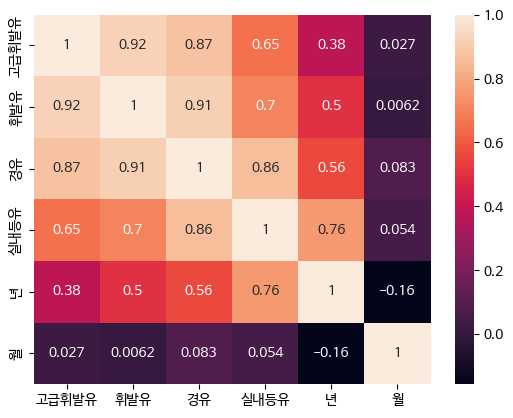

In [173]:
sns.heatmap(tdf.corr(numeric_only=True), annot=True)

#### 휘발유와 경유간 가격차이가 과거에 비해 줄어들고 있다는걸 데이터로 알아보기

In [174]:
tdf['휘발유_경유_가격차이'] = tdf['휘발유'] - tdf['경유']
tdf['휘발유_실내등유_가격차이'] = tdf['휘발유'] - tdf['실내등유']
tdf

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시,휘발유_경유_가격차이,휘발유_실내등유_가격차이
0,A0033584,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178(유천동),2024년 01월,HD현대오일뱅크,셀프,1767.84,1525.74,1432.23,NaN,강원,강릉시,2024,1,2024-01-01,93.51,NaN
1,A0011352,강원 강릉시,(주)대성길,강원 강릉시 구정면 칠성로 187,2024년 01월,S-OIL,셀프,NaN,1551.90,1477.90,1297.74,강원,강릉시,2024,1,2024-01-01,74.00,254.16
2,A0011408,강원 강릉시,(주)명진에너지 북강릉지점,강원 강릉시 연곡면 동해대로 4091,2024년 01월,SK에너지,셀프,1760.00,1551.97,1454.23,NaN,강원,강릉시,2024,1,2024-01-01,97.74,NaN
3,A0010581,강원 강릉시,(주)범일로self주유소,강원 강릉시 범일로 475 (내곡동),2024년 01월,SK에너지,셀프,NaN,1506.29,1440.97,1252.42,강원,강릉시,2024,1,2024-01-01,65.32,253.87
4,A0011610,강원 강릉시,(주)삼보물류 삼보주유소,강원 강릉시 동해대로 3970,2024년 01월,S-OIL,일반,NaN,1568.00,1505.10,1400.00,강원,강릉시,2024,1,2024-01-01,62.90,168.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581892,A0012886,충북 충주시,한양주유소,충북 충주시 살미면 유주막로 72,2023년 06월,HD현대오일뱅크,일반,NaN,1627.00,1422.37,1293.33,충북,충주시,2023,6,2023-06-01,204.63,333.67
581893,A0012787,충북 충주시,해운주유소,충북 충주시 갱고개로 44 (교현동),2023년 06월,SK에너지,셀프,NaN,1554.00,1392.07,1292.50,충북,충주시,2023,6,2023-06-01,161.93,261.50
581894,A0013152,충북 충주시,화령개발(주)공단주유소,충북 충주시 국원대로 368(목행동),2023년 06월,SK에너지,셀프,NaN,1659.00,1500.67,1350.00,충북,충주시,2023,6,2023-06-01,158.33,309.00
581895,A0016900,충북 충주시,황제주유소,충북 충주시 신니면 중원대로 5775,2023년 06월,GS칼텍스,셀프,NaN,1557.20,1379.00,1188.33,충북,충주시,2023,6,2023-06-01,178.20,368.87


In [175]:
diffprice_df = tdf[['일시', '휘발유_경유_가격차이', '휘발유_실내등유_가격차이']].groupby('일시').mean()
diffprice_df

,휘발유_경유_가격차이,휘발유_실내등유_가격차이
일시,,
2020-01-01,170.097310,596.196251
2020-02-01,175.593018,582.533142
2020-03-01,188.548703,541.656842
2020-04-01,191.538054,470.930636
2020-05-01,189.554761,456.901645
2020-06-01,195.168844,516.508337
2020-07-01,197.486484,543.011189
2020-08-01,197.666742,541.477122
2020-09-01,198.139261,534.207149


<Axes: xlabel='일시'>

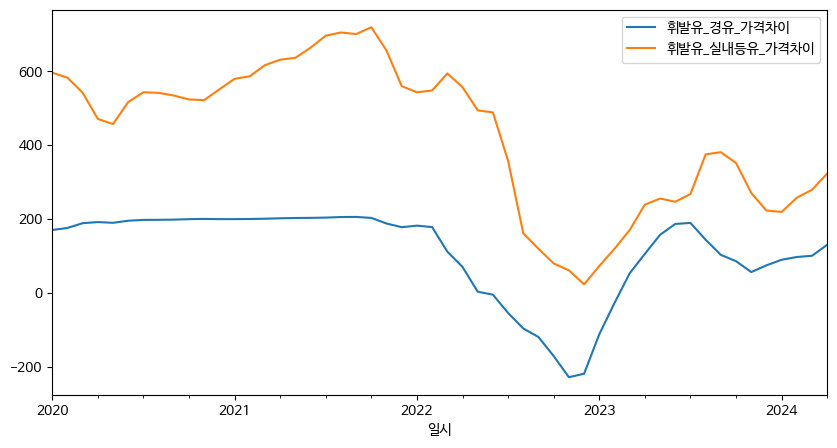

In [176]:
plt.rcParams['axes.unicode_minus'] = False
diffprice_df.plot(figsize=(10,5))

#### 일시와 휘발유 가격의 관계를 산점도로 그리기
- matplotlib : scatter() 사용
- seaborn : relplot() 사용

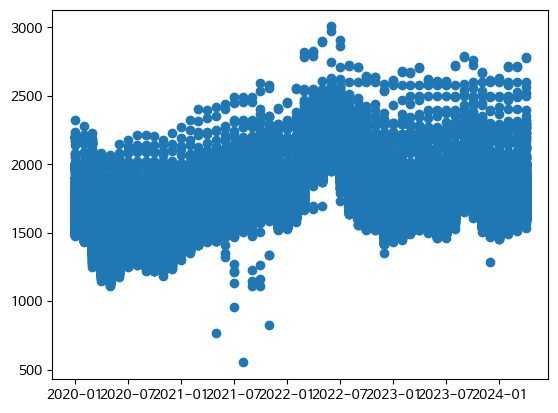

In [177]:
plt.scatter(tdf['일시'], tdf['휘발유'])

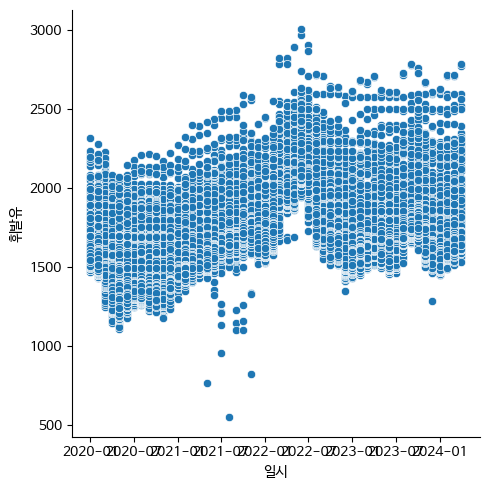

In [178]:
sns.relplot(data=tdf, x='일시', y='휘발유')

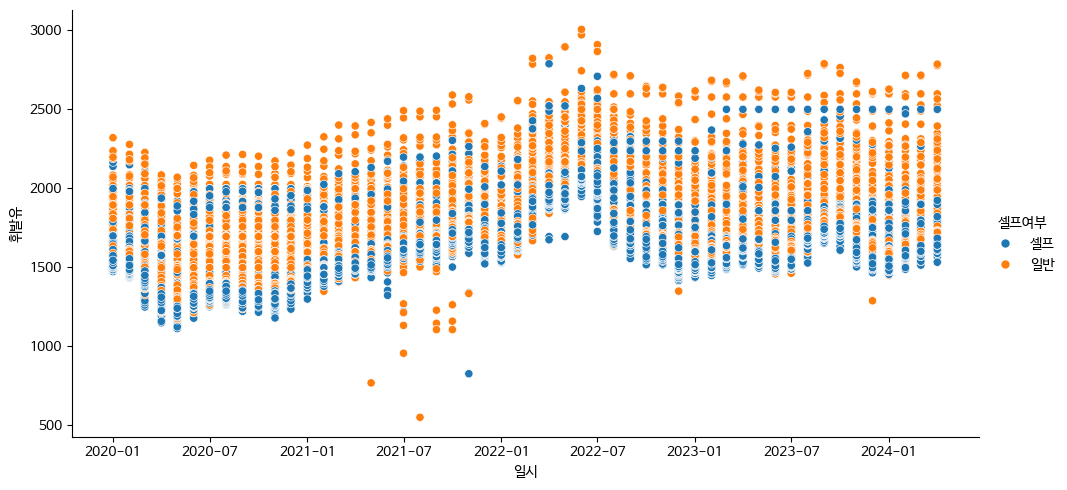

In [179]:
sns.relplot(data=tdf, x='일시', y='휘발유', hue='셀프여부', aspect=2)

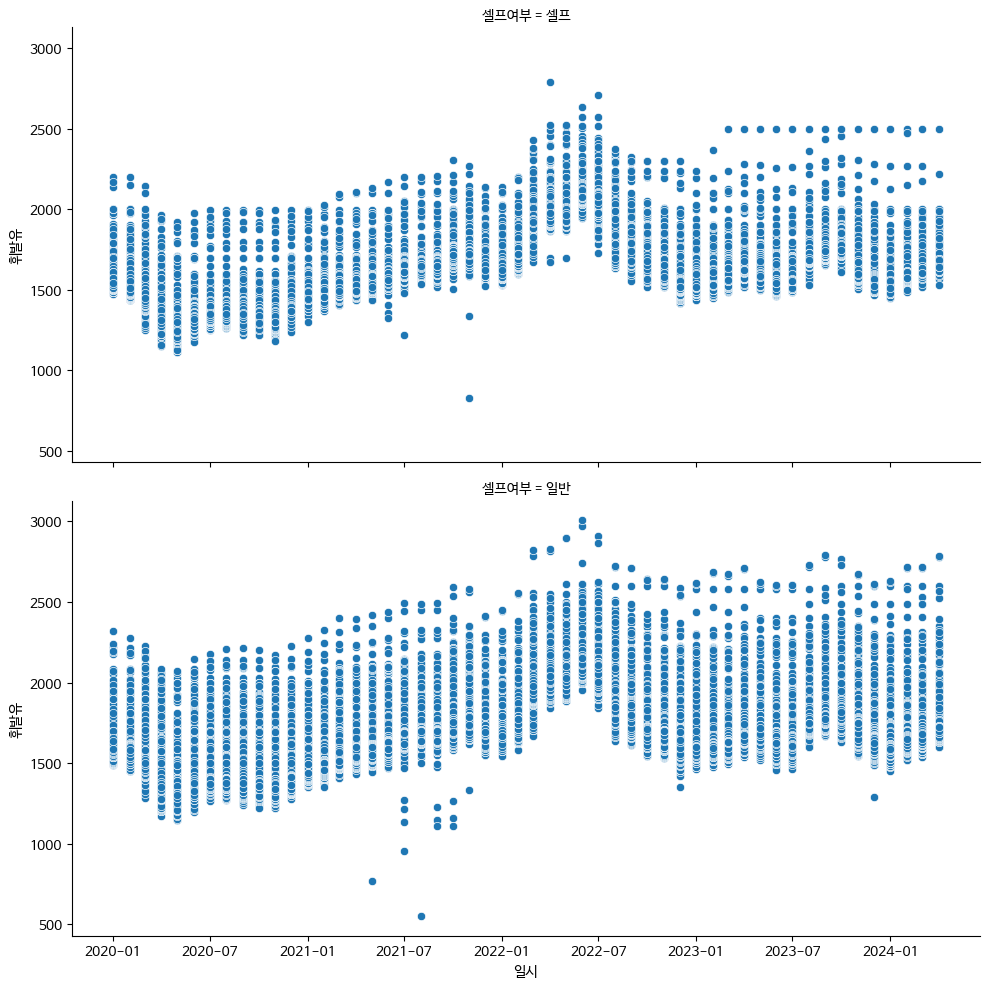

In [180]:
sns.relplot(data=tdf, x='일시', y='휘발유', row='셀프여부', aspect=2)

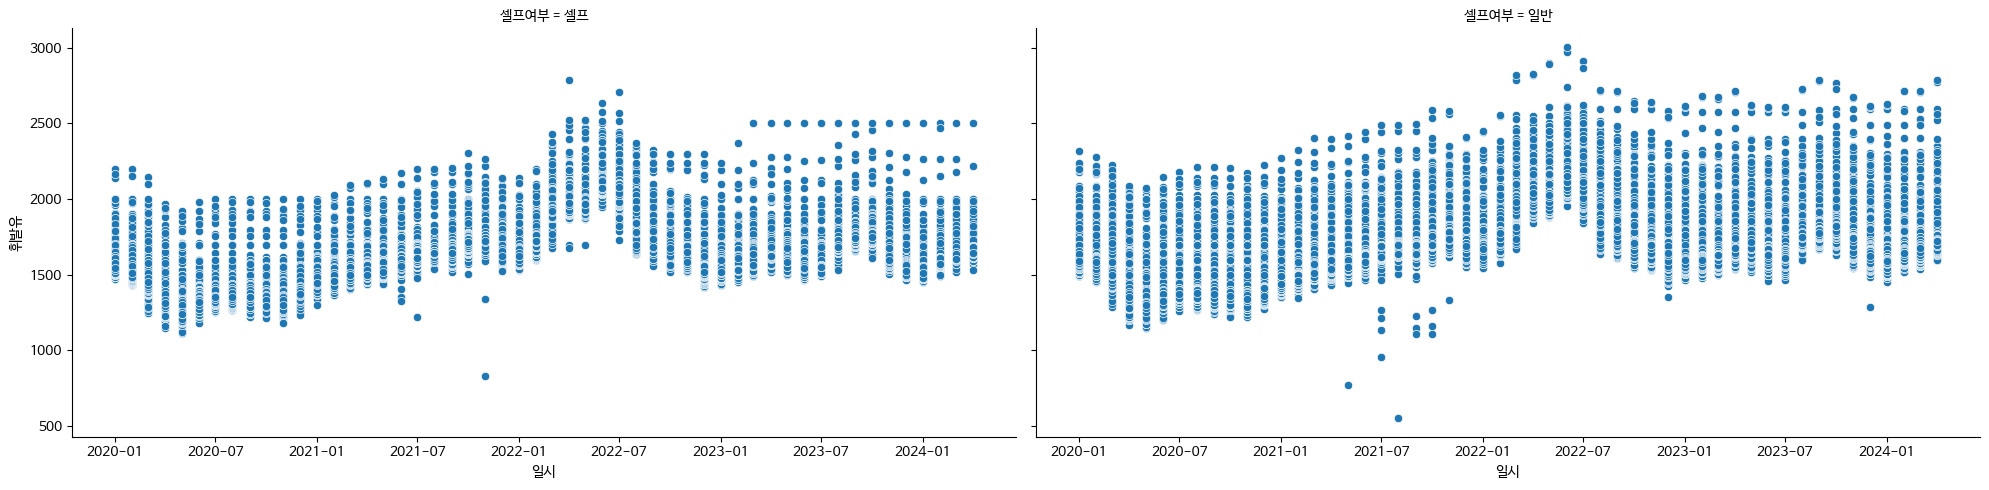

In [181]:
sns.relplot(data=tdf, x='일시', y='휘발유', col='셀프여부', aspect=2)

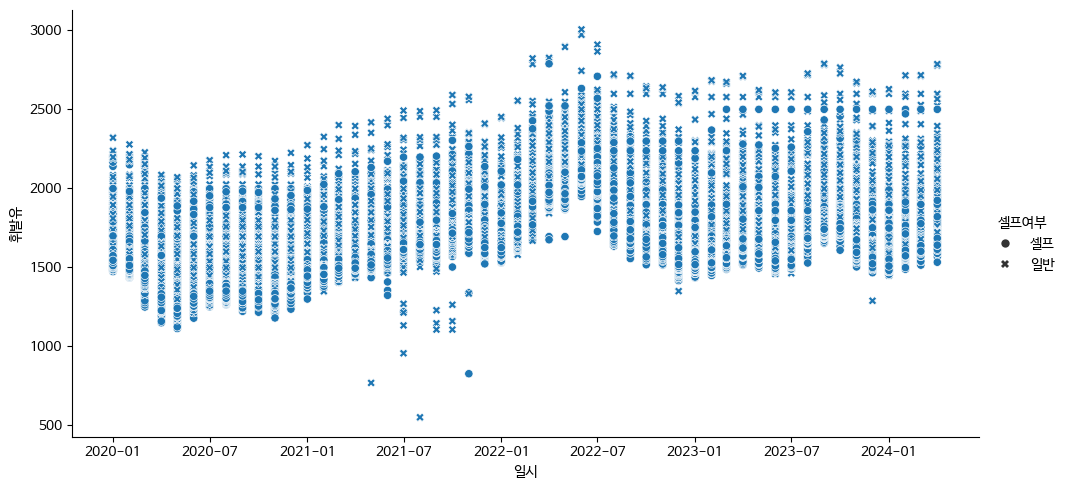

In [182]:
sns.relplot(data=tdf, x='일시', y='휘발유', style='셀프여부', aspect=2)

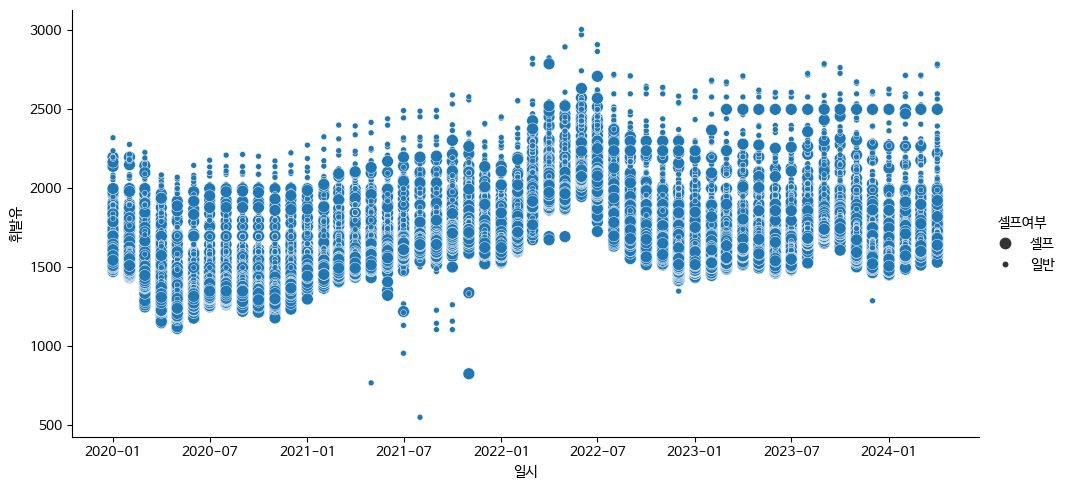

In [183]:
sns.relplot(data=tdf, x='일시', y='휘발유', size='셀프여부', aspect=2)

#### 500원대인 최저가 휘발유는 정상가격일까요 아니면 이상치일까요 데이터로 알아보기

<Axes: >

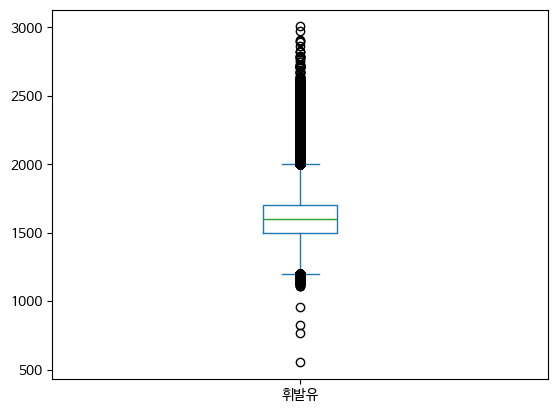

In [184]:
tdf['휘발유'].plot(kind='box')

In [185]:
tdf[tdf['휘발유']<700]

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시,휘발유_경유_가격차이,휘발유_실내등유_가격차이
451057,A0027981,경남 창원시,태양주유소,경남 창원시 마산회원구 삼호로 159 (양덕동),2021년 08월,GS칼텍스,일반,NaN,551.67,727.5,NaN,경남,창원시,2021,8,2021-08-01,-175.83,NaN


In [186]:
tdf[(tdf['도단위']=='경남')&(tdf['시단위']=='창원시')&(tdf['상호']=='태양주유소')&(tdf['년']==2021)]

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시,휘발유_경유_가격차이,휘발유_실내등유_가격차이
48336,A0027981,경남 창원시,태양주유소,경남 창원시 마산회원구 삼호로 159 (양덕동),2021년 07월,GS칼텍스,일반,NaN,1623.39,1423.39,1000.00,경남,창원시,2021,7,2021-07-01,200.00,623.39
193254,A0027981,경남 창원시,태양주유소,경남 창원시 마산회원구 삼호로 159 (양덕동),2021년 04월,GS칼텍스,일반,NaN,1508.00,1308.00,1000.00,경남,창원시,2021,4,2021-04-01,200.00,508.00
238225,A0027981,경남 창원시,태양주유소,경남 창원시 마산회원구 삼호로 159 (양덕동),2021년 03월,GS칼텍스,일반,NaN,1490.26,1290.26,953.23,경남,창원시,2021,3,2021-03-01,200.00,537.03
361798,A0027981,경남 창원시,태양주유소,경남 창원시 마산회원구 삼호로 159 (양덕동),2021년 06월,GS칼텍스,일반,NaN,1540.47,1340.93,1000.00,경남,창원시,2021,6,2021-06-01,199.54,540.47
451057,A0027981,경남 창원시,태양주유소,경남 창원시 마산회원구 삼호로 159 (양덕동),2021년 08월,GS칼텍스,일반,NaN,551.67,727.50,NaN,경남,창원시,2021,8,2021-08-01,-175.83,NaN
496003,A0027981,경남 창원시,태양주유소,경남 창원시 마산회원구 삼호로 159 (양덕동),2021년 02월,GS칼텍스,일반,NaN,1469.33,1269.33,900.00,경남,창원시,2021,2,2021-02-01,200.00,569.33
507393,A0027981,경남 창원시,태양주유소,경남 창원시 마산회원구 삼호로 159 (양덕동),2021년 05월,GS칼텍스,일반,NaN,1513.48,1313.97,1000.00,경남,창원시,2021,5,2021-05-01,199.51,513.48


#### **[Quiz8]** 제주도에서 평균 휘발유 가격이 가장 낮은 주유소와 가장 높은 주유소를 셀프여부별로 각각 찾아보세요.

In [221]:
jeju_self_df = tdf[(tdf['도단위'] == '제주')&(tdf['셀프여부']=='셀프')]
jeju_self_df
jeju_self_df_min=jeju_self_df[jeju_self_df['휘발유']==jeju_self_df['휘발유'].min()]
jeju_self_df_min

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시,휘발유_경유_가격차이,휘발유_실내등유_가격차이
479069,A0031018,제주 서귀포시,대포주유소,제주 서귀포시 일주서로 559 (대포동),2020년 05월,HD현대오일뱅크,셀프,NaN,1232.84,1104.45,614.19,제주,서귀포시,2020,5,2020-05-01,128.39,618.65


In [226]:
jeju_self_df_max=jeju_self_df[jeju_self_df['휘발유']==jeju_self_df['휘발유'].max()]
jeju_self_df_max

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시,휘발유_경유_가격차이,휘발유_실내등유_가격차이
232424,A0031018,제주 서귀포시,대포주유소,제주 서귀포시 일주서로 559 (대포동),2022년 07월,HD현대오일뱅크,셀프,NaN,2297.1,2306.13,NaN,제주,서귀포시,2022,7,2022-07-01,-9.03,NaN


In [225]:
jeju_notself_df = tdf[(tdf['도단위'] == '제주')&(tdf['셀프여부']=='일반')]
jeju_notself_df_min=jeju_notself_df[jeju_notself_df['휘발유']==jeju_notself_df['휘발유'].min()]
jeju_notself_df_min

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시,휘발유_경유_가격차이,휘발유_실내등유_가격차이
479086,A0031139,제주 서귀포시,수도석유(주)한신주유소,제주 서귀포시 천제연로 77,2020년 05월,SK에너지,일반,NaN,1230.0,1102.9,596.13,제주,서귀포시,2020,5,2020-05-01,127.1,633.87


In [227]:
jeju_notself_df_max=jeju_notself_df[jeju_notself_df['휘발유']==jeju_notself_df['휘발유'].max()]
jeju_notself_df_max

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,도단위,시단위,년,월,일시,휘발유_경유_가격차이,휘발유_실내등유_가격차이
232570,A0004382,제주 제주시,인양주유소,제주 제주시 추자면 영흥4길 1,2022년 07월,자가상표,일반,NaN,2400.0,2440.0,1950.0,제주,제주시,2022,7,2022-07-01,-40.0,450.0


#### **[Quiz9]** 2024년 4월 기준 각 도별 유종별 취급 주유소의 개수를 구해보세요.

In [228]:
april_df = tdf[(tdf['년'] == 2024) & (tdf['월'] == 4)]

In [233]:
april_oil= april_df[['도단위','고급휘발유', '휘발유', '경유', '실내등유']].groupby('도단위').count()
april_oil

,고급휘발유,휘발유,경유,실내등유
도단위,,,,
강원,79,623,627,479
경기,469,2272,2276,1313
경남,84,1015,1017,694
경북,74,1176,1181,825
광주,57,242,242,97
대구,89,351,351,167
대전,56,214,214,71
부산,90,357,359,133
서울,249,440,439,138
